## Projeto 2


### Como microdados que descrevem um magistrado, a exemplo de seu cargo, região e lotação, afetam sua renda total


---------

#### Lendo a base de dados


In [1]:
import pandas as pd
from  IPython.display import display
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
import os
import re

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())
df = pd.read_csv("DF/contracheque.csv")

Esperamos trabalhar no diretório
c:\Users\dado7\OneDrive\Documentos\INSPER\Insper 2023.2\CDados\CDadosP2


## Visualizando a base de dados:

In [3]:
df = df.drop(columns=['cpf']) #Retirando a coluna CPF, pois os valores eram NaN.
df = df.drop(columns=['url']) #Retirando a coliuna URL, pois ela não é muito útil.
df.tail(2)

,nome,cargo,lotacao,subsidio,direitos_pessoais,indenizacoes,direitos_eventuais,total_de_rendimentos,previdencia_publica,imposto_de_renda,descontos_diversos,retencao_por_teto_constitucional,total_de_descontos,rendimento_liquido,remuneracao_do_orgao_de_origem,diarias,tribunal,orgao,data_de_publicacao,mesano_de_referencia
161765,Octavio Augusto Simon de Souza,Juiz Civil de 2º Grau,Aposentado,30471.11,0.0,0.0,0.0,30471.11,3491.57,6497.87,0.0,0.0,9989.44,20481.67,0.0,0.0,Tribunal de Justiça Militar do Estado do Rio G...,Tribunal de Justiça Militar do Rio Grande do Sul,2017-12-06,2017-11-01
161766,Romeu Martinelli,Juiz Civil de 2º Grau,Aposentado,30471.11,0.0,0.0,85987.9,116459.01,5494.49,5974.28,0.0,0.0,11468.77,104990.24,0.0,0.0,Tribunal de Justiça Militar do Estado do Rio G...,Tribunal de Justiça Militar do Rio Grande do Sul,2017-12-06,2017-11-01


In [4]:
# conhecendo os tipos da nossa base de dados
df.dtypes

nome                                 object
cargo                                object
lotacao                              object
subsidio                            float64
direitos_pessoais                   float64
indenizacoes                        float64
direitos_eventuais                  float64
total_de_rendimentos                float64
previdencia_publica                 float64
imposto_de_renda                    float64
descontos_diversos                  float64
retencao_por_teto_constitucional    float64
total_de_descontos                  float64
rendimento_liquido                  float64
remuneracao_do_orgao_de_origem      float64
diarias                             float64
tribunal                             object
orgao                                object
data_de_publicacao                   object
mesano_de_referencia                 object
dtype: object

In [5]:
df.total_de_rendimentos.describe()

count    1.603380e+05
mean     4.093185e+04
std      3.304963e+04
min     -3.454195e+04
25%      3.047110e+04
50%      3.819228e+04
75%      5.234458e+04
max      8.230004e+06
Name: total_de_rendimentos, dtype: float64

In [6]:
df.total_de_descontos.describe()

count    1.617630e+05
mean     8.671913e+03
std      1.118869e+04
min     -1.003869e+05
25%      2.109750e+03
50%      9.423540e+03
75%      1.244000e+04
max      1.174584e+06
Name: total_de_descontos, dtype: float64

In [7]:
df.rendimento_liquido.describe()

count    1.603340e+05
mean     3.001104e+04
std      2.766561e+04
min     -3.454195e+04
25%      2.021386e+04
50%      2.727021e+04
75%      3.813852e+04
max      7.267672e+06
Name: rendimento_liquido, dtype: float64

In [8]:
pd.crosstab(df.tribunal , df.total_de_rendimentos)

total_de_rendimentos,-34541.95,-22127.84,-12583.96,-10327.69,-5465.60,-5235.39,-4087.99,-3837.81,-2644.46,-1954.80,...,406242.08,487325.88,520385.63,538436.48,545618.22,729723.03,883504.19,1174584.41,3558771.05,8230004.01
tribunal,,,,,,,,,,,,,,,,,,,,,
Conselho Nacional de Justiça,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Conselho da Justiça Federal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Superior Tribunal Militar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Superior Tribunal de Justiça,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tribunal Regional Eleitoral da Bahia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tribunal de Justiça do Pará,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tribunal de Justiça do Piauí,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tribunal de Justiça do Rio Grande do Norte,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
pd.crosstab(df.tribunal , df.total_de_descontos)

total_de_descontos,-100386.89,-62862.95,-62438.37,-55379.34,-55116.18,-53875.21,-53512.98,-53044.85,-51200.50,-48180.13,...,116222.12,116234.44,116791.27,117128.46,124511.87,125472.12,200410.26,684254.84,962332.20,1174584.41
tribunal,,,,,,,,,,,,,,,,,,,,,
Conselho Nacional de Justiça,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Conselho da Justiça Federal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Superior Tribunal Militar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Superior Tribunal de Justiça,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tribunal Regional Eleitoral da Bahia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tribunal de Justiça do Pará,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tribunal de Justiça do Piauí,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tribunal de Justiça do Rio Grande do Norte,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


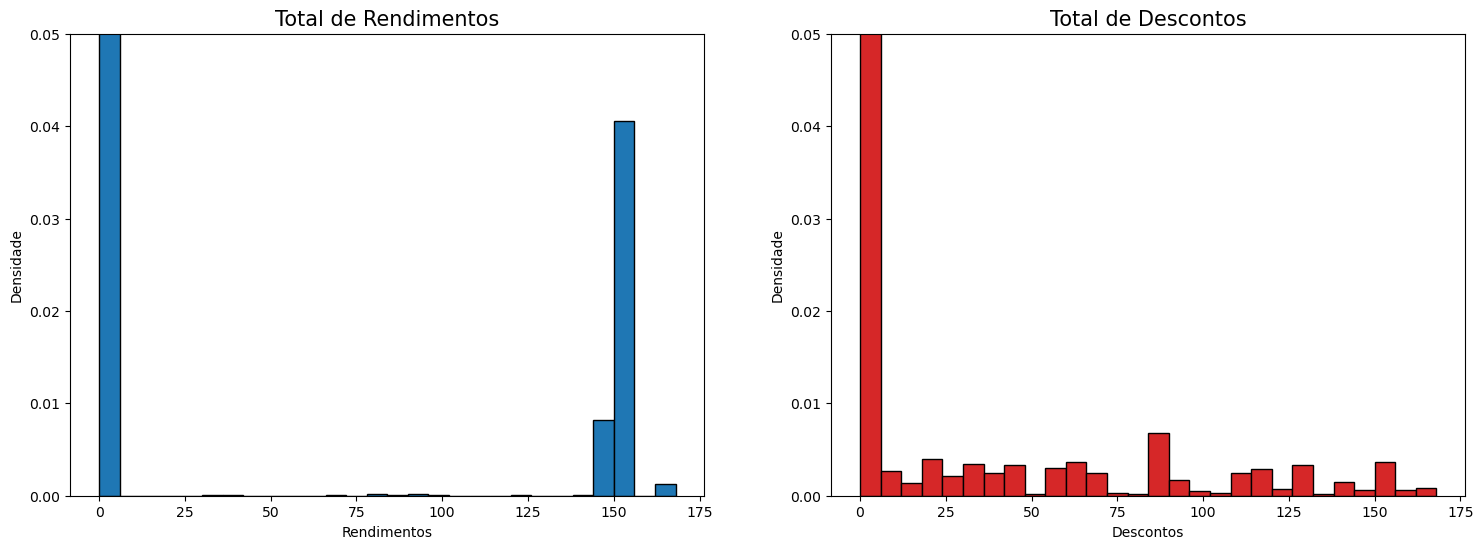

In [10]:
intervalo = np.arange(0, 170, 6)

plt.figure(figsize=(18,6))

plt.subplot(121)
plt.hist(df.total_de_rendimentos, bins = intervalo, edgecolor='black', density = True, color = 'tab:blue')
plt.title("Total de Rendimentos", size=15)
plt.xlabel("Rendimentos")
plt.ylabel("Densidade")
plt.ylim(0,0.05)

plt.subplot(122)
plt.hist(df.total_de_descontos , bins = intervalo, edgecolor='black', density = True, color = 'tab:red')
plt.title("Total de Descontos", size=15)
plt.xlabel("Descontos")
plt.ylabel("Densidade")
plt.ylim(0,0.05)


plt.show()

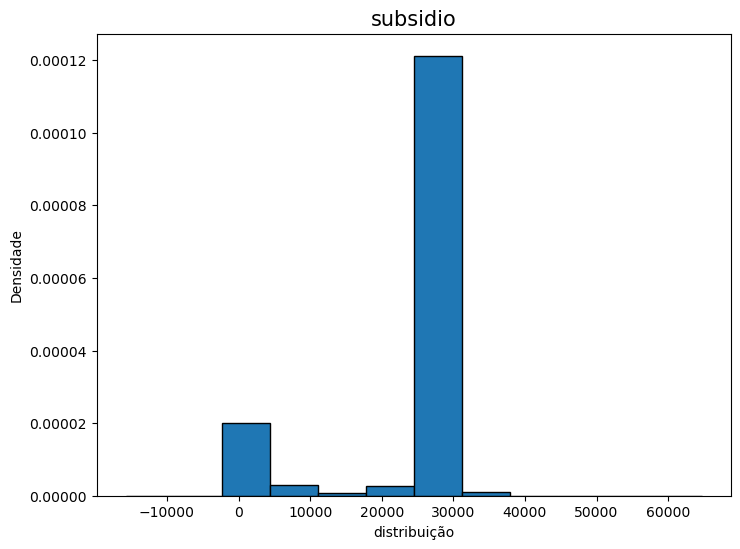

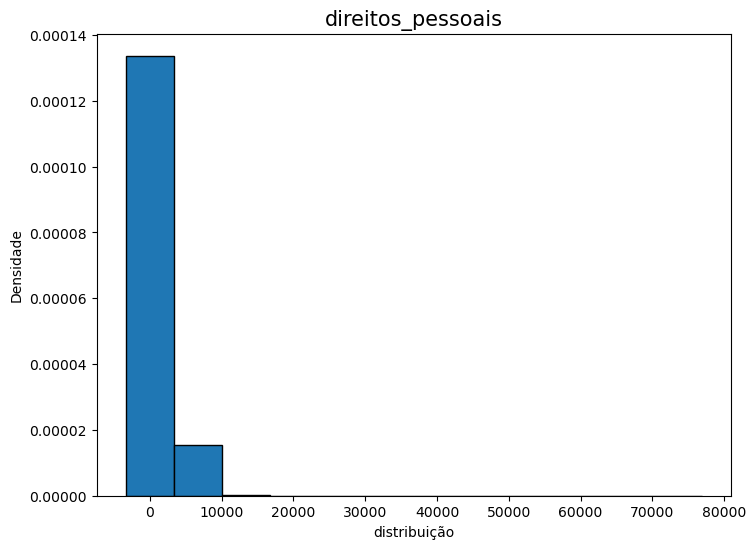

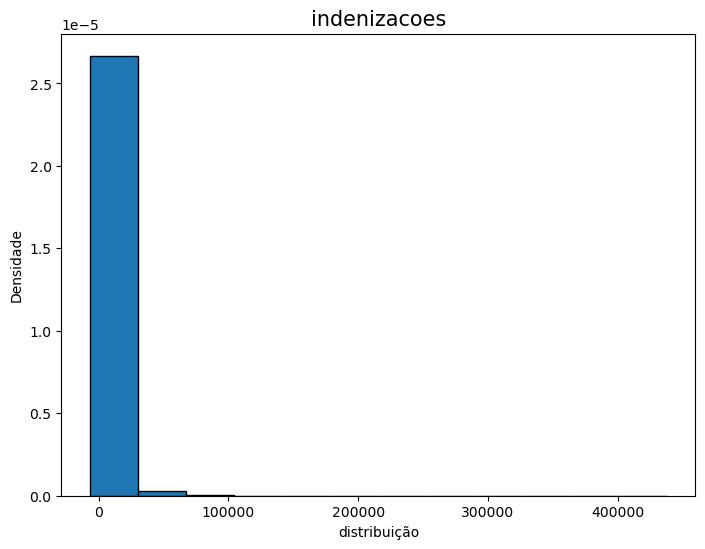

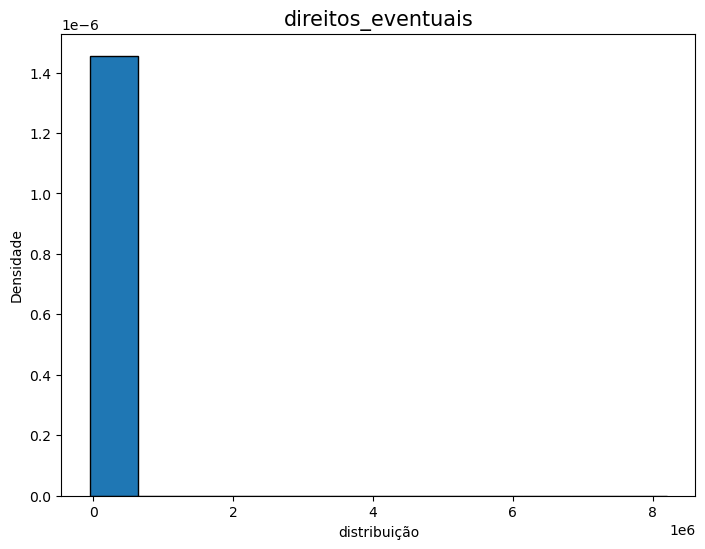

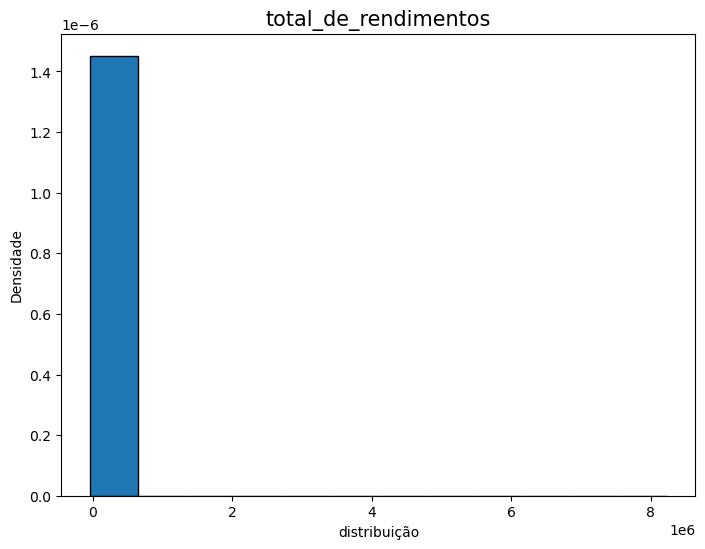

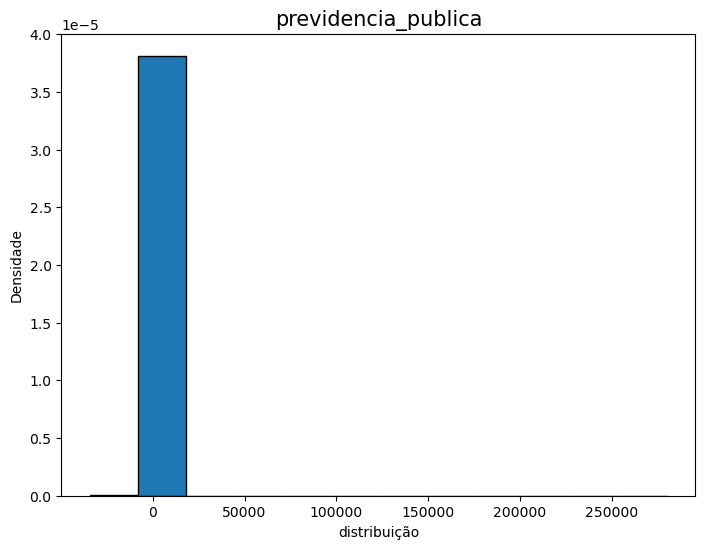

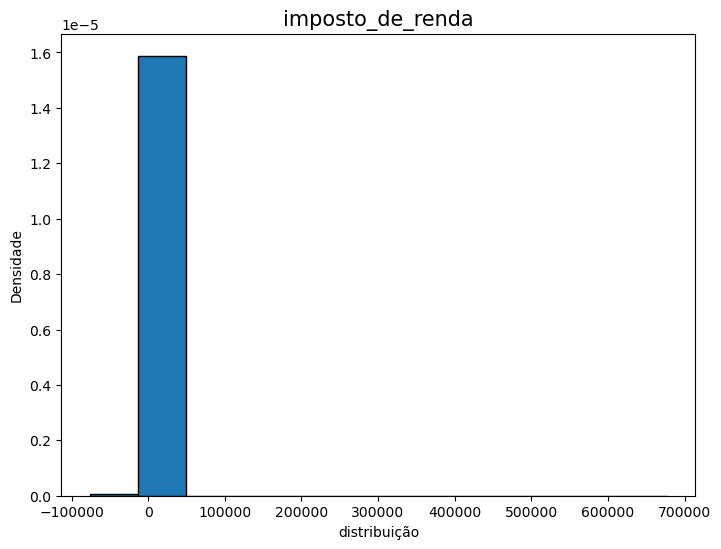

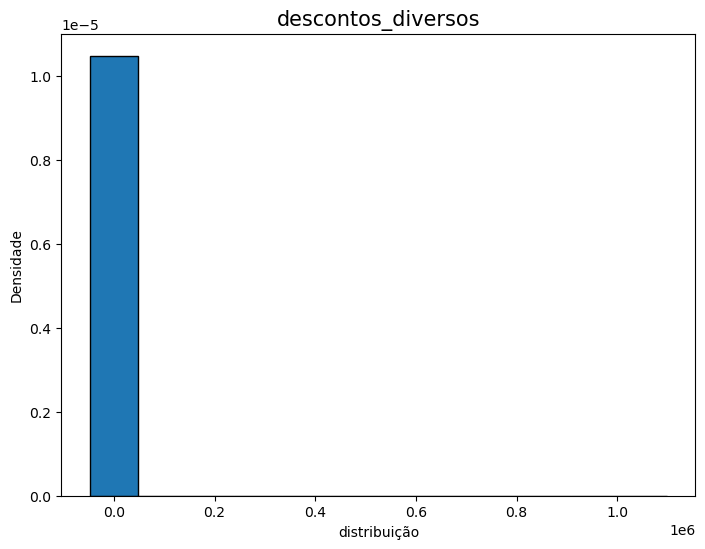

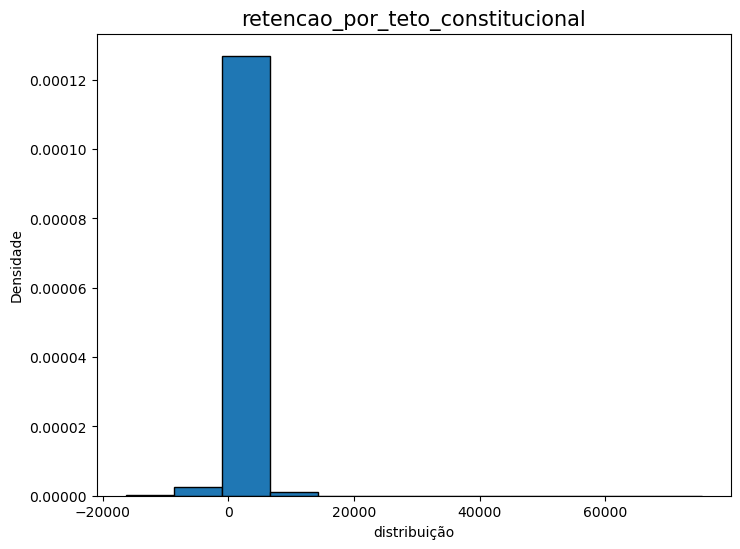

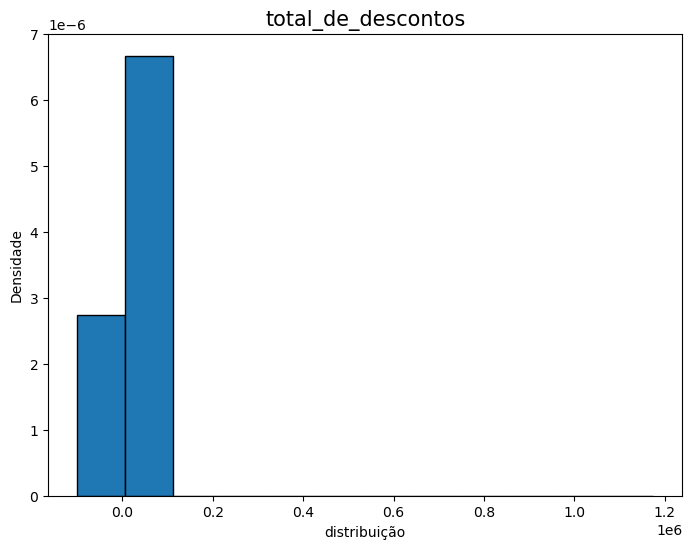

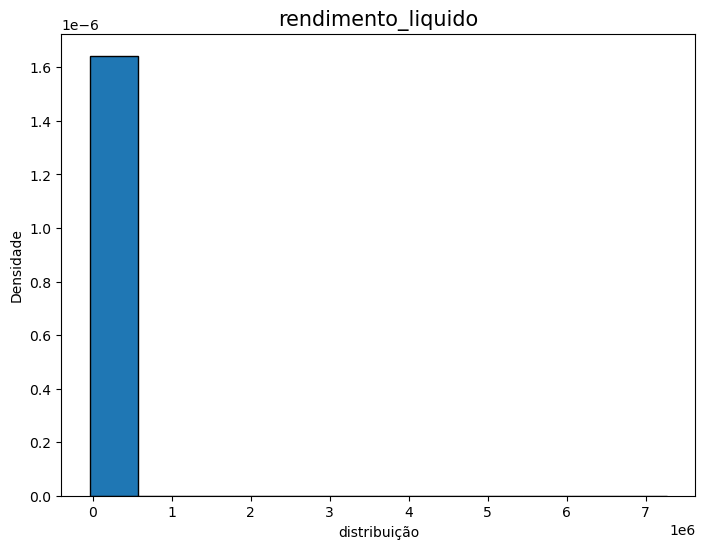

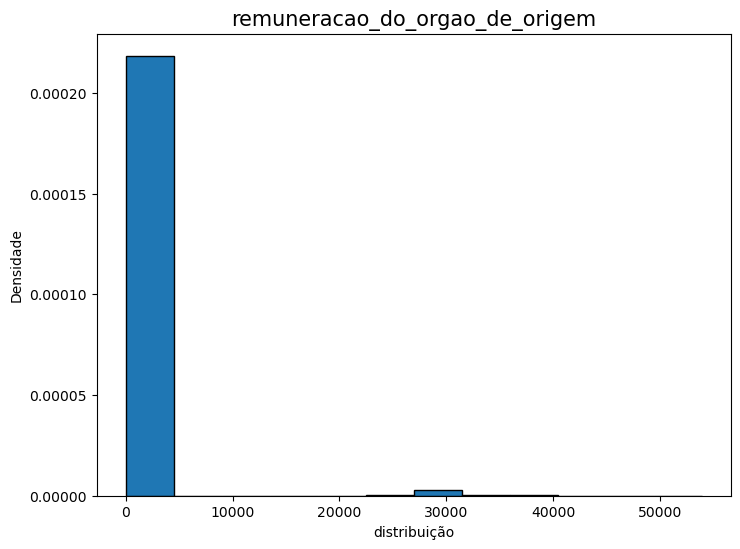

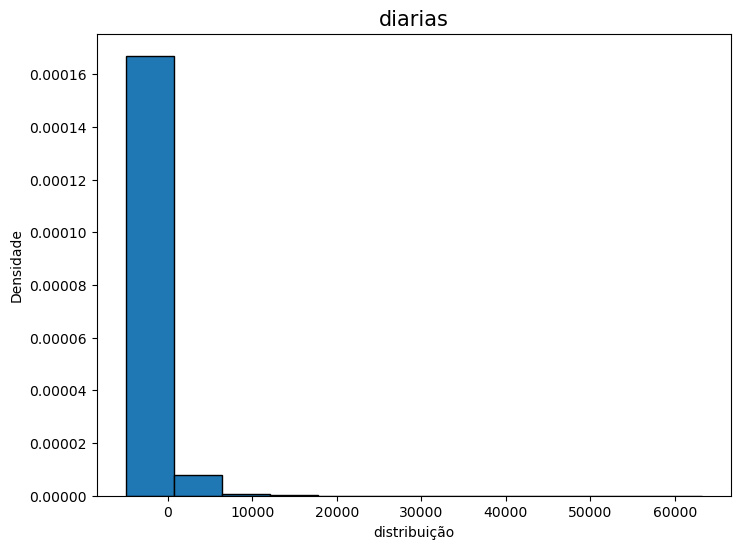

In [11]:
nomes = ['subsidio','direitos_pessoais','indenizacoes','direitos_eventuais','total_de_rendimentos','previdencia_publica','imposto_de_renda','descontos_diversos','retencao_por_teto_constitucional','total_de_descontos','rendimento_liquido','remuneracao_do_orgao_de_origem','diarias']

for i in nomes:
    plt.figure(figsize=(18,6))

    plt.subplot(121)
    plt.hist(df[i], bins = 12, edgecolor='black', density = True, color = 'tab:blue')
    plt.title(f'{i}', size=15)
    plt.xlabel("distribuição")
    plt.ylabel("Densidade")
    #plt.ylim(0,0.5)
plt.show()

---
### Glossário das Colunas

#### Com o melhor entendimento do leitor em mente, segue a explicação resumida do que cada coluna mais intrincada do dataframe implica:



Variável | Descrição
:---:|---:
cargo | função que o invidíduo exerce no poder judiciário
lotação | jurisdição do magistrado dentro de seu cargo.
subsidio | remuneração mensal fixa dos magistrados e autoridades do setor público
direitos_pessoais | benefícios conseguidos pelo governo, auxílios
indenizações | valor pago ao magistrado para ressarcimento de despesas do serviço
direitos_eventuais | pagamentos incomuns que náo fazem parte da remuneração usual, como férias não aproveitadas
TOTAL DE RENDIMENTOS | montante total recebido pelo indivíduo
previdência pública | valor descontado do salário para cobrir aposentadoria futura
imposto de renda | desconto sobre rendimento mensal
descontos diversos | outros descontos no geral
retenção por teto constitucional | refere-se ao limite máximo de salário ditado pela constituição
RENDIMENTO LÍQUIDO | Montante recebido após feitos todos os descontos
remuneração do órgão de origem | valor bruto da remuneração do funcionário, antes de quaisquer descontos ou benefícios.
diárias | valor recebido para cobrir despesas diversas de viagens e trabalho
Tribunal e Órgão | Instituição à qual o indivíduo empresta seus serviços, seja esta um tribunal ou órgão



In [12]:
# Já de início, veremos se uma mesma pessoa pode aparecer mais de uma vez no dataframe


Celina = df.loc[df['nome'] == 'CELINA DIETRICH E TRIGUEIROS TEIXEIRA PINTO']

print (len(Celina))
Celina.describe()


11


,subsidio,direitos_pessoais,indenizacoes,direitos_eventuais,total_de_rendimentos,previdencia_publica,imposto_de_renda,descontos_diversos,retencao_por_teto_constitucional,total_de_descontos,rendimento_liquido,remuneracao_do_orgao_de_origem,diarias
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.0,11.000000,11.000000,11.0,11.0
mean,13157.977273,828.075455,2361.695455,14508.482727,30856.230909,1592.115455,3620.263636,1344.433636,0.0,6556.812727,24299.418182,0.0,0.0
std,15117.364949,2746.415581,2715.313454,14537.422356,30856.524948,1883.816718,3973.252549,4384.554160,0.0,9361.506821,23649.743432,0.0,0.0
min,0.000000,0.000000,0.000000,-154.390000,-154.390000,0.000000,0.000000,0.000000,0.0,0.000000,-154.390000,0.0,0.0
25%,0.000000,0.000000,0.000000,4477.220000,4554.415000,0.000000,388.610000,0.000000,0.0,388.610000,4183.170000,0.0,0.0
50%,0.000000,0.000000,0.000000,4631.610000,9108.830000,0.000000,1635.570000,0.000000,0.0,1635.570000,7473.260000,0.0,0.0
75%,28947.550000,0.000000,5232.730000,24639.300000,58884.580000,3184.230000,6111.270000,45.000000,0.0,9340.500000,46927.315000,0.0,0.0
max,28947.550000,9108.830000,5297.730000,42007.930000,75873.210000,4776.350000,12222.540000,14563.770000,0.0,31562.660000,57063.360000,0.0,0.0


#### Como vemos acima, um mesmo magistrado aparece diversas vezes no dataframe. Deve-se isso ao tamanho da amostra, mas esse fato não só não é um problema como nos beneficia.

#### Visto que o dataframe foi atualizado em meses diferentes, cada discrepância individual significa muito menos no todo. Além disso, os dados também revelam salários por posições diversas na magistratura para a mesma pessoa e área, o que nos ajudará a diferenciar a remuneração de cada cargo

-----------------------------------------

-----------

### **Agora, para que possamos posteriormente analisar os magistrados por local de atuação, dividiremos os tribunais por estado de origem, também elencando cada estado por região geográfica**

In [123]:
# Criaremos um grande dicionário único, que separa os Tribunais por estados nos quais estão localizados e esses estados pelas respectivas regiões geográficas.

Tribunais = {
    'Norte': {'Acre' : ["Tribunal de Justiça do Acre", "Tribunal Regional Eleitoral do Acre"], 'Amapá':["Tribunal de Justiça do Amapá", "Tribunal Regional Eleitoral do Amapá"], 'Amazonas' : ["Tribunal de Justiça do Amazonas", "Tribunal Regional Eleitoral do Amazonas", 'Tribunal Regional do Trabalho da 11ª Região', 'Tribunal Regional do Trabalho da 11ª Região (RR e AM)'], 'Pará':["Tribunal de Justiça do Pará", "Tribunal Regional Eleitoral do Pará", 'Tribunal Regional do Trabalho da 8ª Região', 'Tribunal Regional do Trabalho da 8ª Região (PA e AP)'], 'Rondônia':["Tribunal de Justiça de Rondônia", "Tribunal Regional Eleitoral de Rondônia", 'Tribunal Regional do Trabalho da 14ª Região', 'Tribunal Regional do Trabalho da 14ª Região  (AC e RO)', 'Tribunal Regional do Trabalho da 14ª Região (AC e RO)'], 'Roraima':["Tribunal de Justiça de Roraima", "Tribunal Regional Eleitoral de Roraima"], 'Tocantins':["Tribunal de Justiça de Tocantins","Tribunal Regional Eleitoral de Tocantins"]},
    'Nordeste': {'Alagoas' :["Tribunal de Justiça de Alagoas", "Tribunal Regional Eleitoral de Alagoas", 'Tribunal Regional do Trabalho da 19ª Região', 'Tribunal Regional do Trabalho da 19ª Região (AL)'], 'Bahia': ["Tribunal de Justiça da Bahia", "Tribunal Regional Eleitoral da Bahia", 'Tribunal Regional do Trabalho da 5ª Região', 'Tribunal Regional do Trabalho da 5ª Região (BA)'], 'Ceará':["Tribunal de Justiça do Ceará", "Tribunal Regional Eleitoral do Ceará", 'Tribunal Regional do Trabalho da 7ª Região', 'Tribunal Regional do Trabalho da 7ª Região (CE)'],  'Maranhão' : ["Tribunal de Justiça do Maranhão", "Tribunal Regional Eleitoral do Maranhão", 'Tribunal Regional do Trabalho da 16ª Região', 'Tribunal Regional do Trabalho da 16ª Região (MA)'], 'Paraíba':["Tribunal de Justiça da Paraíba", "Tribunal Regional Eleitoral da Paraíba", 'Tribunal Regional do Trabalho da 13ª Região', 'Tribunal Regional do Trabalho da 13ª Região (PB)'], 'Pernambuco' : ["Tribunal Regional Federal da 5a Região", "Tribunal de Justiça de Pernambuco", "Tribunal Regional Eleitoral de Pernambuco", 'Tribunal Regional do Trabalho da 6ª Região','Tribunal Regional do Trabalho da 6ª Região(PE)', 'Tribunal Regional do Trabalho da 6ª Região (PE)' ], 'Piauí': ["Tribunal de Justiça do Piauí", "Tribunal Regional Eleitoral do Piauí", 'Tribunal Regional do Trabalho da 22ª Região', 'Tribunal Regional do Trabalho da 22ª Região (PI)'], 'Rio Grande do Norte':["Tribunal de Justiça do Rio Grande do Norte", "Tribunal Regional Eleitoral do Rio Grande do Norte", 'Tribunal Regional do Trabalho da 21ª Região','Tribunal Regional do Trabalho da 21ª Região (RN)' ], 'Sergipe':["Tribunal de Justiça de Sergipe", "Tribunal Regional Eleitoral de Sergipe",'Tribunal Regional do Trabalho da 20ª Região', 'Tribunal Regional do Trabalho da 20ª Região  (SE)', 'Tribunal Regional do Trabalho da 20ª Região (SE)']},
    'Centro-Oeste': {'Goiás' : ["Tribunal de Justiça de Goiás", "Tribunal Regional Eleitoral de Goiás", 'Tribunal Regional do Trabalho da 18ª Região', 'Tribunal Regional do Trabalho da 18ª Região  (GO)', 'Tribunal Regional do Trabalho da 18ª Região (GO)'], 'Mato Grosso':["Tribunal de Justiça do Mato Grosso", "Tribunal Regional Eleitoral do Mato Grosso", 'Tribunal Regional do Trabalho da 23ª Região', 'Tribunal Regional do Trabalho da 23ª Região(MT)','Tribunal Regional do Trabalho da 23ª Região (MT)'], 'Mato Grosso do Sul':["Tribunal de Justiça do Mato Grosso do Sul", "Tribunal Regional Eleitoral do Mato Grosso do Sul", 'Tribunal Regional do Trabalho da 24ª Região', 'Tribunal Regional do Trabalho da 24ª Região  (MS)', 'Tribunal Regional do Trabalho da 24ª Região (MS)'], 'Distrito Federal': ["Supremo Tribunal Federal", "Superior Tribunal de Justiça", "Conselho Nacional de Justiça", "Superior Tribunal Militar", "Tribunal Superior do Trabalho / Conselho Superior da Justiça do Trabalho", "Conselho Superior da Justiça do Trabalho","Conselho da Justiça Federal", "Tribunal Superior Eleitoral", "Tribunal Regional Federal da 1a Região", "Tribunal de Justiça do Distrito Federal e Territórios", "Tribunal Regional Eleitoral do Distrito Federal e Territórios", 'Tribunal Regional do Trabalho da 10ª Região', 'Tribunal Regional do Trabalho da 10ª Região  (DF e TO)', 'Tribunal Regional do Trabalho da 10ª Região (DF e TO)','Tribunal Superior do Trabalho / Conselho Superior da Justiça do Trabalho', 'Tribunal Superior do Trabalho/Conselho Superior da Justiça do Trabalho', 'Tribunal Superior do Trabalho/ Conselho Superior da Justiça do Trabalho']},
'Sudeste': {'Espírito Santo': ["Tribunal de Justiça do Espírito Santo", "Tribunal Regional Eleitoral do Espírito Santo", 'Tribunal Regional do Trabalho da 17ª Região', 'Tribunal Regional do Trabalho da 17ª Região (ES)'], 'Minas Gerais':["Tribunal Regional Federal da 6a Região", "Tribunal de Justiça de Minas Gerais", "Tribunal Regional Eleitoral de Minas Gerais", 'Tribunal Regional do Trabalho da 3ª Região', 'Tribunal Regional do Trabalho da 3ª Região(MG)', 'Tribunal Regional do Trabalho da 3ª Região (MG)', 'Tribunal de Justiça Militar do Estado de Minas Gerais'], 'Rio de Janeiro' : ["Tribunal Regional Federal da 2a Região", "Tribunal de Justiça do Rio de Janeiro", "Tribunal Regional Eleitoral do Rio de Janeiro", 'Tribunal Regional do Trabalho da 1ª Região(RJ)', 'Tribunal Regional do Trabalho da 1ª Região','Tribunal Regional do Trabalho da 1ª Região (RJ)'], 'São Paulo' : ["Tribunal Regional Federal da 3a Região", "Tribunal de Justiça de São Paulo", "Tribunal Regional Eleitoral de São Paulo", 'Tribunal Regional do Trabalho da 2ª Região', 'Tribunal Regional do Trabalho da 2ª Região (SP capital)', 'Tribunal Regional do Trabalho da 15ª Região', 'Tribunal Regional do Trabalho da 15ª Região (SP Interior)', 'Tribunal de Justiça Militar do Estado de São Paulo']},
    'Sul': {'Paraná' : ["Tribunal de Justiça do Paraná", "Tribunal Regional Eleitoral do Paraná", 'Tribunal Regional do Trabalho da 9ª Região', 'Tribunal Regional do Trabalho da 9ª Região (PR)'], 'Rio Grande do Sul': ["Tribunal Regional Federal da 4a Região", "Tribunal de Justiça do Rio Grande do Sul", "Tribunal Regional Eleitoral do Rio Grande do Sul", 'Tribunal Regional do Trabalho da 4ª Região', 'Tribunal Regional do Trabalho da 4ª Região(RS)', 'Tribunal Regional do Trabalho da 4ª Região (RS)', 'Tribunal de Justiça Militar do Estado do Rio Grande do Sul'], 'Santa Catarina' : ["Tribunal de Justiça de Santa Catarina", "Tribunal Regional Eleitoral de Santa Catarina", 'Tribunal Regional do Trabalho da 12ª Região', 'Tribunal Regional do Trabalho da 12ª Região (SC)']}
}

# Esse dicionário contém não só todos os tribunais, como algumas formas pontuais e diferenciadas de escrita encontradas no documento, para que todos sejam analisados sem falta.

# Idealizando uma função que nos devolva o estado e região nos quais um tribunal está inserido.

def Local_Tribunal(tribunal):
    for regiao, estados in Tribunais.items():
        for estado in estados:
            if tribunal in estados[estado]:
                return (estado, regiao)

    return ('Na', 'Na')


# Agora já com nosso dicionário, podemos criar colunas de Estado e Região no Dataframe


df['Estado'], df['Regiao'] = zip(*df['tribunal'].apply(Local_Tribunal))

Checagem = df.loc[df['Estado'] == 'Na']

print (len(Checagem))

# Como vemos abaixo, todos os tribunais foram devidamente categorizados em Estado e Região

df.head(1)


0


,nome,cargo,lotacao,subsidio,direitos_pessoais,indenizacoes,direitos_eventuais,total_de_rendimentos,previdencia_publica,imposto_de_renda,...,total_de_descontos,rendimento_liquido,remuneracao_do_orgao_de_origem,diarias,tribunal,orgao,data_de_publicacao,mesano_de_referencia,Estado,Regiao
0,Aldir Guimarães Passarinho Junior,Ministro do Superior Tribunal de Justiça,Superior Tribunal de Justiça,32074.85,0.0,0.0,0.0,32074.85,2907.19,6628.15,...,9535.34,22539.51,0.0,0.0,Superior Tribunal de Justiça,Superior Tribunal de Justiça,2018-04-24,2018-4-01,Distrito Federal,Centro-Oeste


### **Agora, veremos em formato Boxplot como a região de atuação influencia no salário dos magistrados**

<Figure size 800x600 with 0 Axes>

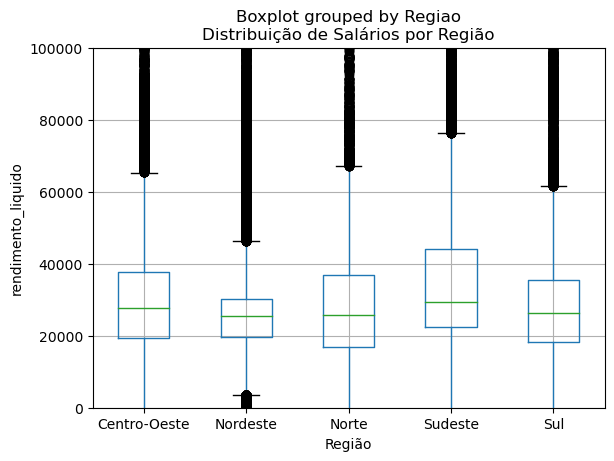

In [132]:
plt.figure(figsize=(8, 6))  # Define o tamanho do gráfico
df.boxplot('rendimento_liquido', 'Regiao')
plt.xlabel('Região')
plt.ylabel('rendimento_liquido')
plt.title('Distribuição de Salários por Região')

plt.ylim(0, 100000)
plt.show()

----------------------------------------
-------------















## Mais um pouco de análise exploratória

#### Tabela de frequências

In [ ]:
#Frequências de lotações
frequencia_de_lotacoes_absoluta = df.lotacao.value_counts()
frequencia_de_lotacoes_relativa = df.lotacao.value_counts(True)

#Frequência de tribunais = Frequencia de órgãos
frequencia_de_tribunais_absoluta = df.tribunal.value_counts()
frequencia_de_tribunais_relativa = df.tribunal.value_counts(True)

#### Outros dados importantes

In [ ]:
total_de_linhas = df.nome.count()

#Salários e descontos
salario_bruto_medio = df.total_de_rendimentos.mean()
salario_liquido_medio = df.rendimento_liquido.mean()
subsidio_medio = df.subsidio.mean()
imposto_de_renda_medio = df.imposto_de_renda.mean()

#Encontrando a porcentagem de magistrados indenizados
zero_count_indenizacoes = (df['indenizacoes'] == 0).sum()
total_de_indenizacoes = total_de_linhas - zero_count_indenizacoes
porcentagem_de_magistrados_indenizados = (total_de_indenizacoes/total_de_linhas) * 100

#Encontrando a porcentagem de magistrados com direitos pessoais (auxílios)
zero_count_auxilios = (df['direitos_pessoais'] == 0).sum()
total_de_auxilios = total_de_linhas - zero_count_auxilios
porcentagem_de_magistrados_com_auxilios = (total_de_auxilios/total_de_linhas) * 100

#Encontrando a porcentagem de magistrados com direitos eventuais (auxílios especiais)
zero_count_auxilios_especiais = (df['direitos_eventuais'] == 0).sum()
total_de_auxilios_especias = total_de_linhas - zero_count_auxilios_especiais
porcentagem_de_magistrados_com_auxilios_especiais = (total_de_auxilios_especias/total_de_linhas) * 100
porcentagem_de_magistrados_com_auxilios_especiais

#Encontrando a porcentagem de magistrados com descontos de previdencia pública
zero_count_previdencia_publica = (df['previdencia_publica'] == 0).sum()
total_de_previdencias_publicas = total_de_linhas - zero_count_previdencia_publica
porcentagem_de_magistrados_com_previdencias_publicas = (total_de_previdencias_publicas/total_de_linhas) * 100

#Encontrando a porcentagem de magistrados com descontos diversos
zero_count_descontos_diversos = (df['descontos_diversos'] == 0).sum()
total_de_descontos_diversos = total_de_linhas - zero_count_descontos_diversos
porcentagem_de_magistrados_com_descontos_diversos = (total_de_descontos_diversos/total_de_linhas) * 100